# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import the libraries you will be using for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [ ]:
#importing the file from gdrive
#first we would need to test how the sampling works for one dataset, and then carry the same out for all.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Try loading one file
df_jan = pd.read_parquet('/content/2023-1.parquet')
print(df_jan.head())
print(df_jan.columns)
df_jan.info()

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \


How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload
df_jan['pick_date'] = df_jan['tpep_pickup_datetime'].dt.date
df_jan['pick_hr'] = df_jan['tpep_pickup_datetime'].dt.hour

In [ ]:
#df_jan.head()
#now group by so 5% data taken is fare from all time frames
sample_data_all = pd.DataFrame()
grouped = df_jan.groupby(['pick_date', 'pick_hr']).grouped = df_jan.groupby(['pick_date', 'pick_hr']).apply(lambda x: x.sample(frac=0.05, random_state=42))
sample_data_all = pd.concat([sample_data_all, grouped], ignore_index=True)
sample_data_all.shape

/tmp/ipython-input-728658555.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = df_jan.groupby(['pick_date', 'pick_hr']).grouped = df_jan.groupby(['pick_date', 'pick_hr']).apply(lambda x: x.sample(frac=0.05, random_state=42))


(152087, 21)

In [ ]:
#the idea behind sampling one file is now extended to all of them
import os

file_list = ['/content/2023-2.parquet', '/content/2023-3.parquet', '/content/2023-4.parquet', '/content/2023-5.parquet', '/content/2023-6.parquet'
, '/content/2023-7.parquet', '/content/2023-8.parquet', '/content/2023-9.parquet', '/content/2023-10.parquet'
, '/content/2023-11.parquet', '/content/2023-12.parquet']

# initialise an empty dataframe
df = pd.DataFrame()

for filename in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), filename)

        # Reading the current file
        df_month = pd.read_parquet(file_path)
        df_month['pick_date'] = df_month['tpep_pickup_datetime'].dt.date
        df_month['pick_hr'] = df_month['tpep_pickup_datetime'].dt.hour
        grouped = df_month.groupby(['pick_date', 'pick_hr']).apply(lambda x: x.sample(frac=0.05, random_state=42))
        sample_data_all = pd.concat([sample_data_all, grouped], ignore_index=True)

    except Exception as e:
        print(f"Error reading file {filename}: {e}")

/tmp/ipython-input-2064131205.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = df_month.groupby(['pick_date', 'pick_hr']).apply(lambda x: x.sample(frac=0.05, random_state=42))
/tmp/ipython-input-2064131205.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = df_month.groupby(['pick_date', 'pick_hr']).apply(lambda x: x.sample(frac=0.05, random_state=42))
/tmp/ipython-input-2064131205.

In [ ]:
#print(sample_data_all.head())
#print(sample_data_all.columns)
#print(sample_all_data.info)
#sample_data_all.shape
sample_data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [ ]:
# Store the df in csv/parquet. Also download the file, so practically, I can reload the file rather than running all the above codes while exploring
type(sample_data_all)
sample_data_all.to_parquet('/sample_data_all.parquet')
from google.colab import files
files.download('/content/sample_data_all.parquet')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [ ]:
# Load the new data file
df = pd.read_parquet('/content/sample_data_all.parquet')

In [ ]:
# df.head()
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pick_date,pick_hr,Airport_fee
0,2,2022-12-31 23:51:30,2022-12-31 23:56:06,1.0,0.86,1.0,N,141,140,1,...,0.5,2.00,0.0,1.0,13.50,2.5,0.00,2022-12-31,23,NaN
1,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,N,138,256,2,...,0.5,0.00,0.0,1.0,41.15,0.0,1.25,2023-01-01,0,NaN
2,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,N,161,237,1,...,0.5,2.58,0.0,1.0,15.48,2.5,0.00,2023-01-01,0,NaN
3,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1.0,N,237,141,2,...,0.5,0.00,0.0,1.0,16.40,2.5,0.00,2023-01-01,0,NaN
4,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.54,1.0,N,143,142,2,...,0.5,0.00,0.0,1.0,11.50,2.5,0.00,2023-01-01,0,NaN


In [ ]:
# df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [ ]:
# Fix the index and drop any columns that are not needed
df.reset_index(drop=True, inplace=True)
df.columns
df.drop(columns=['pick_date', 'pick_hr', 'store_and_fwd_flag'], inplace=True)

In [ ]:
df.columns
#also check if total_amount column has same numbers as added charges: TRUE

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee', 'Airport_fee'],
      dtype='object')

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [ ]:
# Combine the two airport fee columns
df.loc[:, ['airport_fee', 'Airport_fee']]
df.isnull().sum()
df['Airport_Fee'] = df['Airport_fee'].fillna(0) + df['airport_fee'].fillna(0) #combine the values in columns
df.drop(columns=['Airport_fee', 'airport_fee'], inplace=True)

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [ ]:
# check where values of fare amount are negative
#first get all the columns that have negative values

df.describe() #shows some negative values in the metrics

num_cols = df.select_dtypes(include=['float', 'float64', 'float32']).columns.tolist()
neg_cols = []
for cols in num_cols:
  if df[df[cols] < 0].shape[0] > 0:
    neg_cols.append(cols)
print(neg_cols)

#then

['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_Fee']


Did you notice something different in the `RatecodeID` column for above records?

In [ ]:
# Analyse RatecodeID for the negative fare amounts
df_neg = pd.DataFrame()
for col in neg_cols:
  df_neg[col] = df[col]

#Add the ratecodeID as well, to analyse
df_neg['RatecodeID'] = df['RatecodeID']

#sns.pairplot(df_neg)

In [ ]:
# Find which columns have negative values
#check the above code to get all negative columns


In [ ]:
# fix these negative values
for cols in neg_cols:
  df[cols] = np.abs(df[cols])

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [ ]:
# Find the proportion of missing values in each column
#first do a central tendency analysis => Univariate to obtain missing values
print(df.isnull().sum())

#to get the proportion, missing values in each column => percentage of nulls
print(((df.isnull().sum()/df.shape[0])*100).round(2).astype(str) + '%')


VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          64874
trip_distance                0
RatecodeID               64874
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     64874
Airport_Fee                  0
dtype: int64
VendorID                  0.0%
tpep_pickup_datetime      0.0%
tpep_dropoff_datetime     0.0%
passenger_count          3.42%
trip_distance             0.0%
RatecodeID               3.42%
PULocationID              0.0%
DOLocationID              0.0%
payment_type              0.0%
fare_amount               0.0%
extra                     0.0%
mta_tax                   0.0%
tip_amount                0.0%
tolls_amount              

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [ ]:
# Display the rows with null values
df[df.isnull().any(axis=1)]

# Impute NaN values in 'passenger_count'
df['passenger_count'].fillna(df['passenger_count'].mode()[0], inplace = True)
df['passenger_count']

/tmp/ipython-input-1801942923.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['passenger_count'].fillna(df['passenger_count'].mode()[0], inplace = True)


,passenger_count
0,1.0
1,1.0
2,2.0
3,3.0
4,1.0
...,...
1896395,1.0
1896396,1.0
1896397,1.0
1896398,1.0


Did you find zeroes in passenger_count? Handle these.

In [ ]:
df[df['passenger_count'] == 0]
#looks like there are passenger counts as 0, to hanlde this, since it is a count (INT), we better consider mode()
df['passenger_count'].replace(0, df['passenger_count'].mode()[0], inplace=True)
df['passenger_count']


,passenger_count
0,1.0
1,1.0
2,2.0
3,3.0
4,1.0
...,...
1896395,1.0
1896396,1.0
1896397,1.0
1896398,1.0


**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [ ]:
# Fix missing values in 'RatecodeID'
df['RatecodeID'].fillna(df['RatecodeID'].mode()[0], inplace=True)
#df.isnull().sum()
df['RatecodeID']

,RatecodeID
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
1896395,1.0
1896396,1.0
1896397,1.0
1896398,1.0


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [ ]:
# handle null values in congestion_surcharge
df['congestion_surcharge'].describe() #almsot same mean, median
# to be more accurate, let us take the median value to impute
df['congestion_surcharge'].fillna(df['congestion_surcharge'].median(), inplace=True)
df['congestion_surcharge']

,congestion_surcharge
0,2.5
1,0.0
2,2.5
3,2.5
4,2.5
...,...
1896395,2.5
1896396,2.5
1896397,2.5
1896398,2.5


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [ ]:
# Handle any remaining missing values
df.isnull().sum()
#no other missing values detected

,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
trip_distance,0
RatecodeID,0
PULocationID,0
DOLocationID,0
payment_type,0
fare_amount,0


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

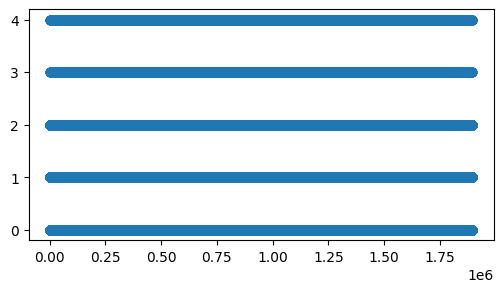

In [ ]:
#get the scatter plot of fare_amount col to check outliers here
plt.figure(figsize=(6, 3))
plt.scatter(df.index, df['payment_type'], alpha=0.5)

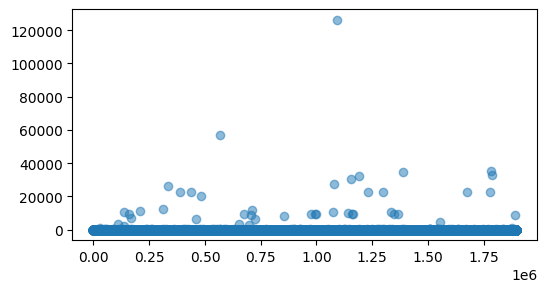

In [ ]:
plt.figure(figsize=(6, 3))
plt.scatter(df.index, df['trip_distance'], alpha=0.5)

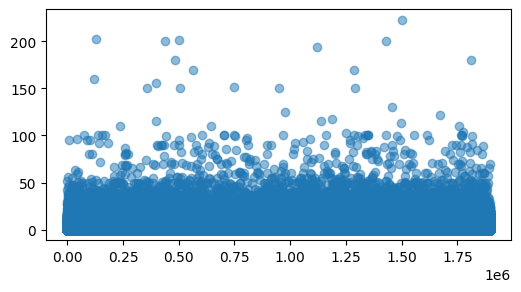

In [ ]:
plt.figure(figsize=(6, 3))
plt.scatter(df.index, df['tip_amount'], alpha=0.5)

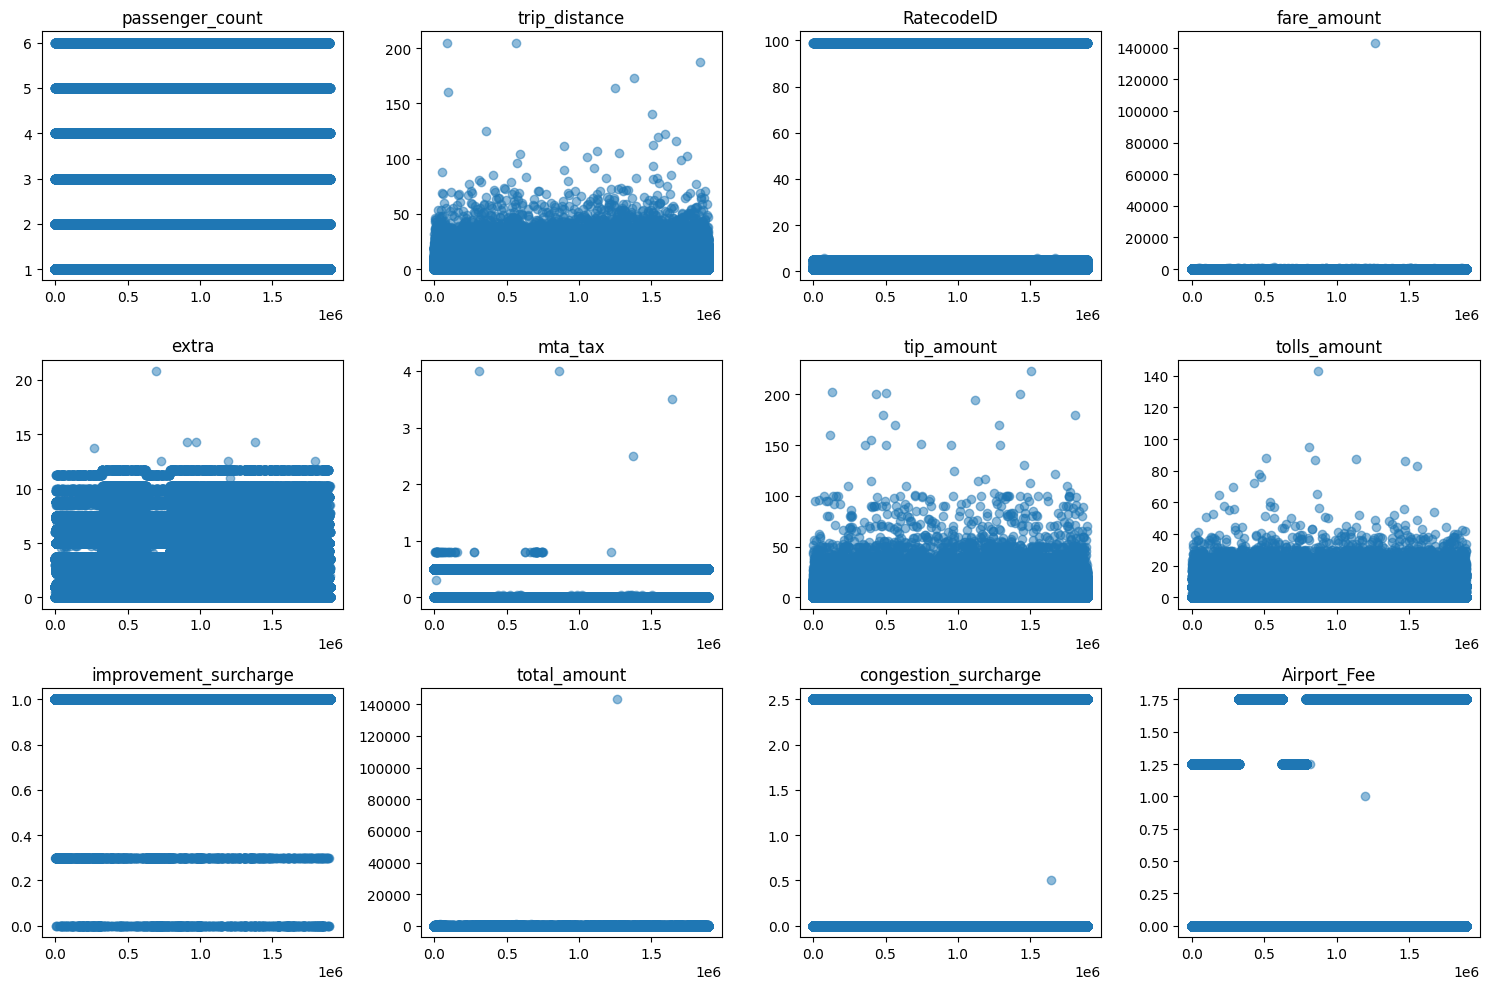

In [ ]:
#also scatter plot of all the number columns to check the data scatter
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    axes[i].scatter(df.index, df[col], alpha=0.5)
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [ ]:
# remove passenger_count > 6
df['passenger_count'].value_counts()
df = df[df['passenger_count'] <= 6]
df[df['passenger_count'] > 6] #all these rows have been removed

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_Fee


In [ ]:
# Continue with outlier handling
#UNIVARIATE
#trip distance
df['trip_distance'].describe() #clearly has outlier => can be seen in scatter plot as well
df[df['trip_distance'] >= 250]['trip_distance'].shape #there are 46 such records

# Since we do not need such trips, we could drop these columns => would typically drop the high fare amount and high other amounts
df = df[df['trip_distance'] <= 250]
print(df[df['trip_distance'] >= 250]['trip_distance'].shape[0])

0


In [ ]:
#payment type
df['payment_type'].value_counts()
df['payment_type'].describe()

,payment_type
count,1.896333e+06
mean,1.163833e+00
std,5.081220e-01
min,0.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,1.000000e+00
max,4.000000e+00


In [ ]:
#since the payment_type is not defined, the 0 must have been a random error, hence we oculd replace this error by imputing mode. On checking the metrics of beore and after => not much changed
df['payment_type'].mode()
df['payment_type'].replace(0, df['payment_type'].mode()[0], inplace=True)

/tmp/ipython-input-2000158518.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['payment_type'].replace(0, df['payment_type'].mode()[0], inplace=True)


<Axes: ylabel='congestion_surcharge'>

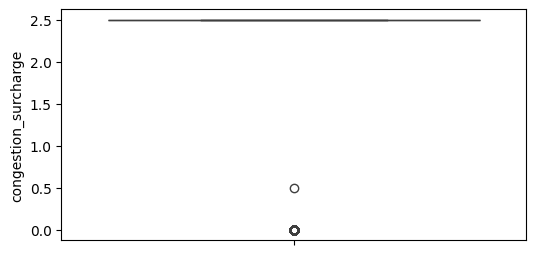

In [ ]:
#from scatter plot, we have congestion charges and airport fee to also have a peculiar value. Let us check the above using boxplot
fig = plt.figure(figsize =(6, 3))
sns.boxplot(data = df["congestion_surcharge"])

In [ ]:
df[df["congestion_surcharge"] == 0.5] #this seems to be a valid number.

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_Fee
1644163,1,2023-11-14 17:47:19,2023-11-14 18:04:03,1.0,3.0,1.0,263,42,1,26.2,0.5,3.5,0.0,0.0,0.0,30.2,0.5,0.0


Text(0, 0.5, 'fare_amount')

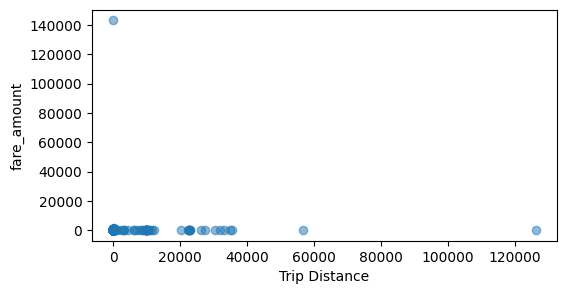

In [ ]:
#BIVARIATE ANALYSIS
plt.figure(figsize = (6, 3))
plt.scatter(df['trip_distance'], df['fare_amount'], alpha=0.5)
plt.xlabel('Trip Distance')
plt.ylabel('fare_amount')
#clearly note that fare amount is ver high for a small distance => outlier

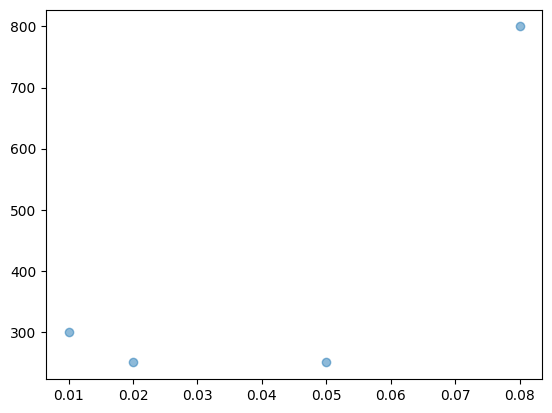

In [ ]:
df = df[df['fare_amount'] < 100000]  # now re-run the previous code, you will see the scatter plot change
#again a zero distance should not have non-zero fare
df = df[(~(df['trip_distance'] == 0) & (df['fare_amount'] > 0))] # now re-run the previous code, you will see the scatter plot change

#also as mentioned, if there are trip_distances nearly zero ==> let us start analysing for less than .5 miles for now
df_filtered = df[(df['trip_distance'] < 0.1) & (df['fare_amount'] > 200)]
plt.scatter(df_filtered['trip_distance'], df_filtered['fare_amount'], alpha=0.5)
plt.show()

#from above, we see that there are cases with less than a 0.1 mile distance and >200 USD fare_amount => which is unrealistic
#since we have high amount of data, we can ignore such columns
df = df[~((df['trip_distance'] < 0.1) & (df['fare_amount'] > 200))]

In [ ]:
#now let us check for all those with trip distance 0 and fare amount 0
df[((df['trip_distance'] == 0) & (df['fare_amount'] == 0))]

df[(df['PULocationID'] == df['DOLocationID']) & (df['trip_distance'] == 0)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_Fee


In [ ]:
#calculate the duration of trip as there are analysis of the same later
pick = df['tpep_pickup_datetime']
drop = df['tpep_dropoff_datetime']
df['trip_duration'] = (drop - pick).dt.total_seconds()/60
df["trip_duration"].corr(df["fare_amount"])

np.float64(0.27933033266772384)

In [ ]:
# Do any columns need standardising?
#the distance vs fare amount can be standardised. Not necessary

#Also downloading the cleaned file to avoid reloading all of above when in need
df.to_parquet('/content/cleaned_data.parquet')
from google.colab import files
files.download('/content/cleaned_data.parquet')

NameError: name 'df' is not defined

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [ ]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_Fee',
 'trip_duration']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [ ]:
# Find and show the hourly trends in taxi pickups
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_Fee
0,2,2022-12-31 23:51:30,2022-12-31 23:56:06,1.0,0.86,1.0,141,140,1,6.5,1.0,0.5,2.00,0.0,1.0,13.50,2.5,0.00
1,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,138,256,2,32.4,6.0,0.5,0.00,0.0,1.0,41.15,0.0,1.25
2,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,161,237,1,7.9,1.0,0.5,2.58,0.0,1.0,15.48,2.5,0.00
3,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1.0,237,141,2,11.4,1.0,0.5,0.00,0.0,1.0,16.40,2.5,0.00
4,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.54,1.0,143,142,2,6.5,1.0,0.5,0.00,0.0,1.0,11.50,2.5,0.00


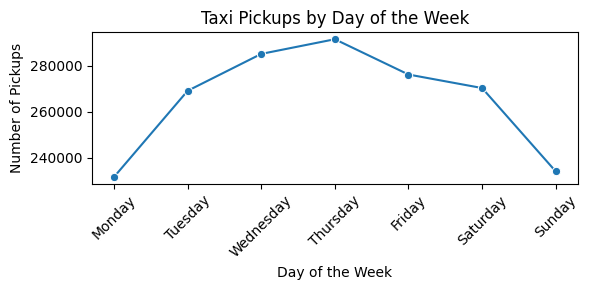

In [ ]:
# Find and show the daily trends in taxi pickups (days of the week)
df['pickup_week'] = df['tpep_pickup_datetime'].dt.dayofweek
day_name_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday',
                3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['pickup_week'] = df['pickup_week'].map(day_name_map)

day_counts = df['pickup_week'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
day_counts = pd.DataFrame(data = day_counts.reset_index())
#day_counts.columns

plt.figure(figsize = (6,3))
sns.lineplot(data=day_counts, x='pickup_week', y='count', marker='o')

plt.title('Taxi Pickups by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
#clearly, the highest pickups are on Thursday, Wednesday is the 2nd highest. Least is on Monday.

    pickup_hr   count
0          18  131417
1          17  125359
2          19  117600
3          15  115354
4          16  115304
5          14  112428
6          13  104875
7          20  104784
8          21  104562
9          12  101686
10         22   96694
11         11   93757
12         10   86447
13          9   79573
14         23   76284
15          8   70261
16          0   52168
17          7   50570
18          1   34986
19          6   25581
20          2   22930
21          3   15055
22          5   10656
23          4   10006


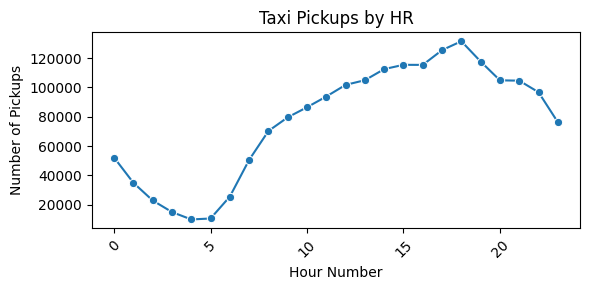

In [ ]:
# Find and show the daily trends in taxi pickups (days of the week)
df['pickup_hr'] = df['tpep_pickup_datetime'].dt.hour

hr_counts = df['pickup_hr'].value_counts().reset_index()
hr_counts.columns = ['pickup_hr', 'count']
print(hr_counts)

plt.figure(figsize = (6,3))
sns.lineplot(data=hr_counts, x='pickup_hr', y='count', marker='o')

plt.title('Taxi Pickups by HR')
plt.xlabel('Hour Number')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
#clearly, the highest pickups between 15 to 20 hrs, looks like the peak is at 18 ish i.e. ~6 pm

<Axes: xlabel='month', ylabel='count'>

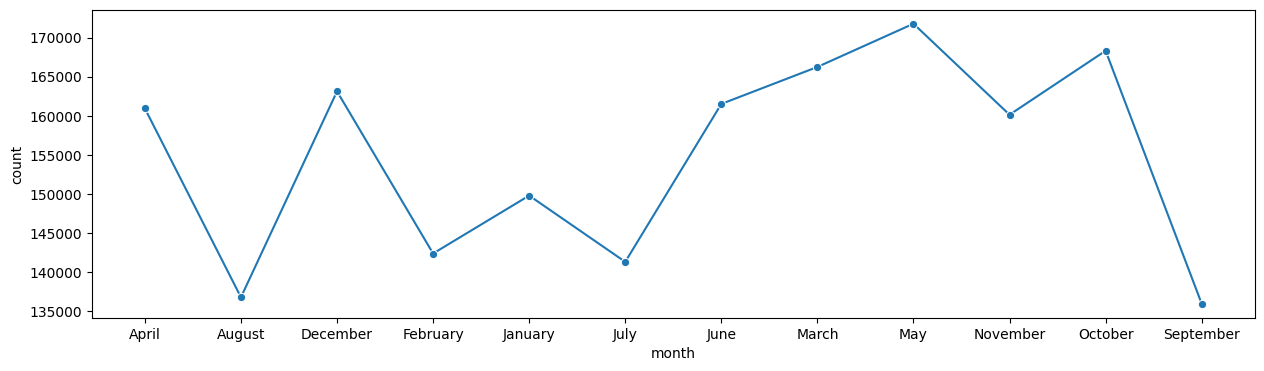

In [ ]:
# Show the monthly trends in pickups
df_month = df['tpep_pickup_datetime'].dt.month_name().value_counts().sort_index()
df_month = pd.DataFrame(data = df_month.reset_index())
df_month.columns = ['month', 'count']
#print(df_month)

#plot of the above
plt.figure(figsize = (15,4))
sns.lineplot(data=df_month, x='month', y='count', marker='o')

#clearly May seems to have the most pick ups

<Axes: xlabel='Quarter', ylabel='count'>

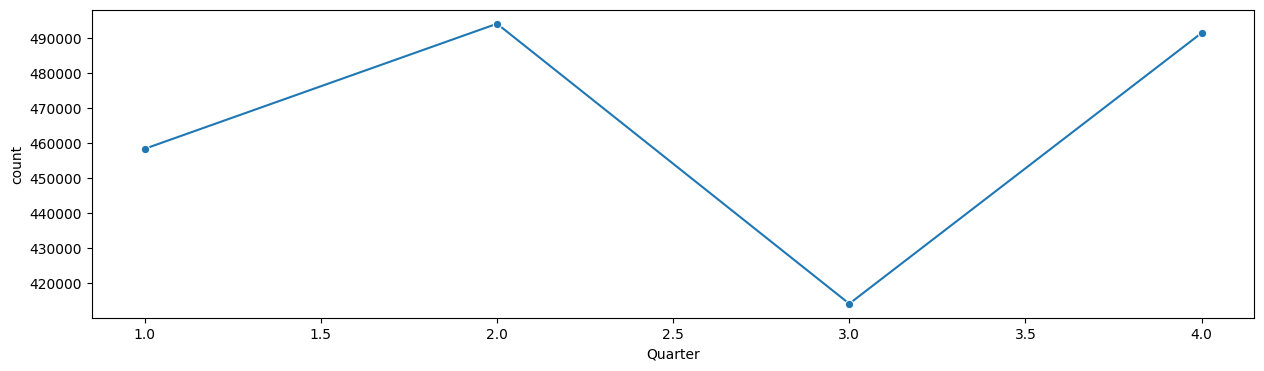

In [ ]:
# Calculate the count for quarter so comparison between revenue and counts of trips can be conducted
df_qua = df['tpep_pickup_datetime'].dt.quarter.value_counts().sort_index()
#quarter_revenue.sort_values()

df_qua = pd.DataFrame(data = df_qua.reset_index())
df_qua.columns = ['Quarter', 'count']
#print(df_qua)

#plot of the above
plt.figure(figsize = (15,4))
sns.lineplot(data=df_qua, x='Quarter', y='count', marker='o')

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [ ]:
# Analyse the above parameters
df[df['fare_amount'] == 0] #we have removed the rows with fare_amount as 0
df[df['tip_amount'] == 0] #this contains 0 values, but this could also give us an idea on how many passengers tip the taxi drivers
df[df['total_amount'] == 0] #no 0 values => this is correct
df[df['trip_distance'] == 0]  #we have removed the rows with trip_distance as 0

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_Fee,trip_duration,pickup_week,pickup_hr


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [ ]:
# Create a df with non zero entries for the selected parameters.
#carried out as data_cleaning step

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

/tmp/ipython-input-3908273391.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values, palette="viridis")


<Axes: xlabel='Month'>

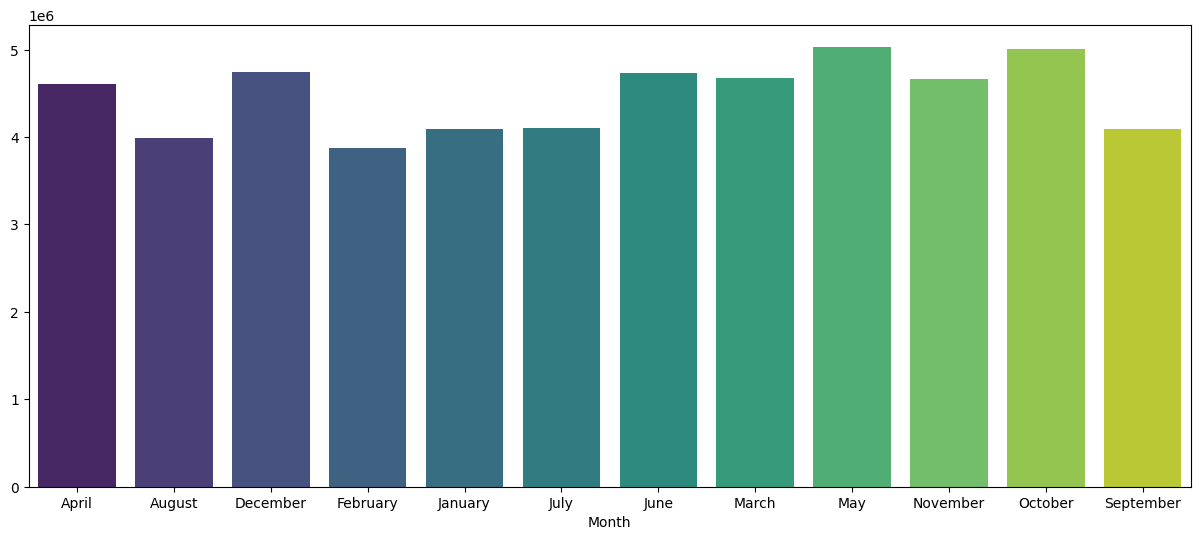

In [ ]:
# Group data by month and analyse monthly revenue
df['Month'] = df['tpep_pickup_datetime'].dt.month_name()
monthly_revenue = df.groupby('Month')['total_amount'].sum()
#monthly_revenue.sort_values()
#print(df_month)

plt.figure(figsize=(15, 6))
sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values, palette="viridis")
#max in may, least in Febraury => Note how the pickups are actually least in September but the revenue is least in August

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

<Axes: xlabel='Quarter', ylabel='total_amount'>

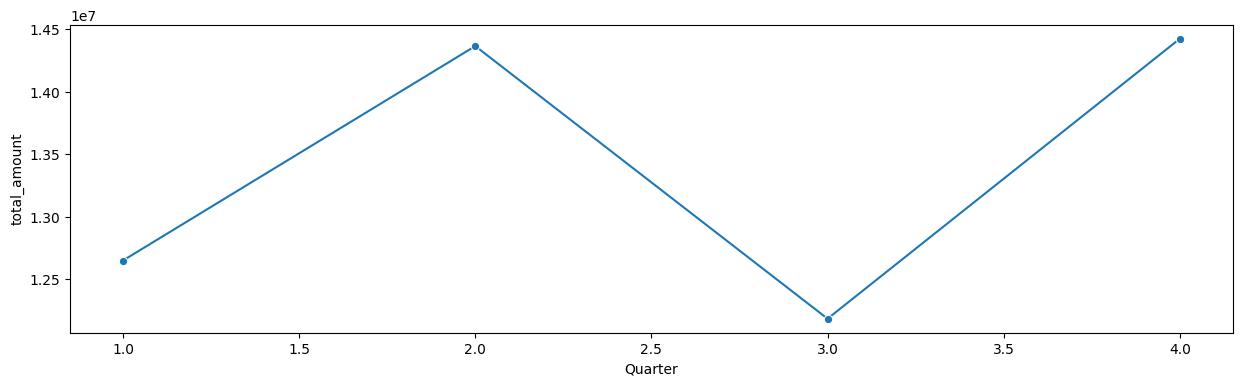

In [ ]:
# Calculate proportion of each quarter
df['Quarter'] = df['tpep_pickup_datetime'].dt.quarter
quarter_revenue = df.groupby('Quarter')['total_amount'].sum()
#quarter_revenue.sort_values()

quarter_revenue = pd.DataFrame(data = quarter_revenue.reset_index())
quarter_revenue.columns = ['Quarter', 'total_amount']
#print(quarter_revenue)
plt.figure(figsize = (15,4))
sns.lineplot(data=quarter_revenue, x='Quarter', y='total_amount', marker='o')
#the least is in 3rd quarter. Also see how the year 2023, has a zig zag/up and down of quarterly revenue

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

<Axes: xlabel='trip_distance', ylabel='fare_amount'>

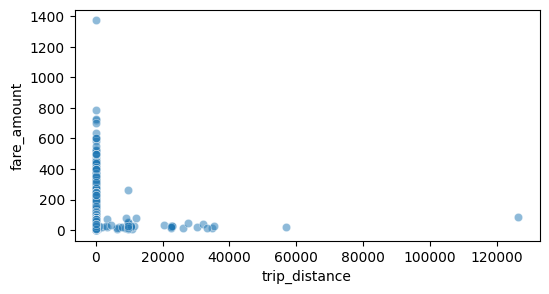

In [ ]:
plt.figure(figsize=(6,3))
sns.scatterplot(data=df, x='trip_distance', y='fare_amount', alpha=0.5)

In [ ]:
# Show how trip fare is affected by distance
df["trip_distance"].corr(df["fare_amount"]) #since correlation coeff is 0.036, it clearly shows that these features are not very well correlated (3.6%)
#Trip fare is directly proportional to trip_distance

np.float64(0.0361817539537539)

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [ ]:
# Show relationship between fare and trip duration
pick = df['tpep_pickup_datetime']
drop = df['tpep_dropoff_datetime']
df['trip_duration'] = (drop - pick).dt.total_seconds()/60
df["trip_duration"].corr(df["fare_amount"])

#plt.figure(figsize = (15,4))
#sns.lineplot(data=df, x='trip_duration', y='fare_amount', marker='o')

np.float64(0.27933033266772384)

In [ ]:
# Show relationship between tip and trip distance
df['tip_amount'].corr(df["trip_distance"])


np.float64(0.5864234289103515)

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

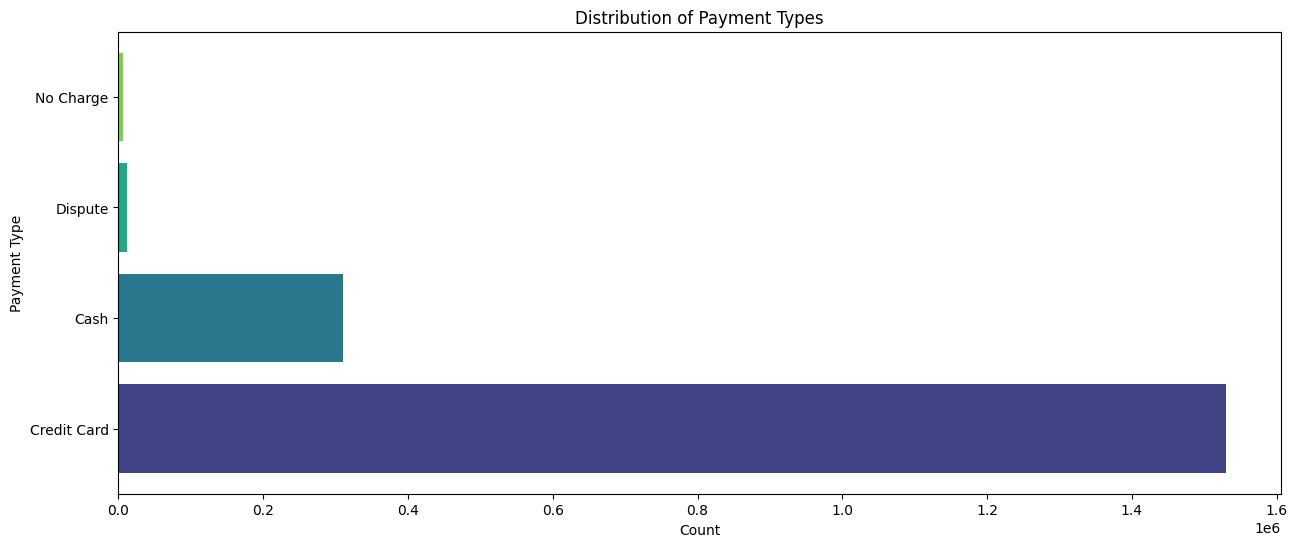

In [ ]:
# Analyse the distribution of different payment types (payment_type).
df_payments = df['payment_type'].value_counts().reset_index() #this would give the counts of all the types of payment
#df_payments.columns
payment_map = {1: 'Credit Card', 2: 'Cash', 3: 'No Charge', 4: 'Dispute'}
df_payments['payment_type'] = df_payments['payment_type'].map(payment_map)
df_payments.columns = ['payment_type', 'count']
df_payments

colors = sns.color_palette("viridis", len(df_payments))

plt.figure(figsize=(15, 6))
plt.barh(df_payments['payment_type'], df_payments['count'], color=colors)
plt.xlabel('Count')
plt.ylabel('Payment Type')
plt.title('Distribution of Payment Types')
plt.show()


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
#!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [4]:
import geopandas as gpd

df = pd.read_parquet('/content/cleaned_data.parquet')
# Read the shapefile using geopandas
zones = gpd.read_file("/content/taxi_zones.shp")# read the .shp file using gpd
zones.head()

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

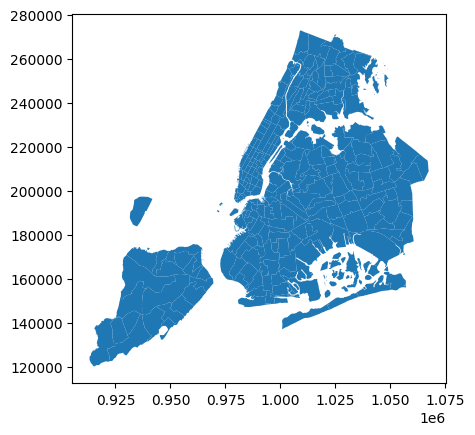

In [ ]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [ ]:
# Merge zones and trip records using locationID and PULocationID
df_merged = pd.merge(df, zones, left_on='PULocationID', right_on='LocationID')
print(df.columns)
print(zones.columns)
df_merged.loc[:,['LocationID', 'PULocationID', 'DOLocationID']]

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'Airport_Fee', 'trip_duration'],
      dtype='object')
Index(['OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough',
       'geometry'],
      dtype='object')


,LocationID,PULocationID,DOLocationID
0,141,141,140
1,138,138,256
2,161,161,237
3,237,237,141
4,143,143,142
...,...,...,...
1841592,48,48,25
1841593,263,263,262
1841594,161,161,261
1841595,79,79,137


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [4]:
# Group data by location and calculate the number of trips
#df_merged[df_merged['LocationID'] == 141].shape #44374

trip_counts = df_merged['LocationID'].value_counts().reset_index()
trip_counts.columns = ['LocationID', 'trip_count']
trip_counts[trip_counts['LocationID'] == 141]

NameError: name 'df_merged' is not defined

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [ ]:
# Merge trip counts back to the zones GeoDataFrame
df_merged = pd.merge(df_merged, trip_counts, left_on='LocationID', right_on='LocationID')
df_merged[df_merged['LocationID'] == 141].shape #validated

df_merged = gpd.GeoDataFrame(df_merged, geometry='geometry', crs="EPSG:4326")
df_merged.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,Airport_Fee,trip_duration,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,trip_count
0,2,2022-12-31 23:51:30,2022-12-31 23:56:06,1.0,0.86,1.0,141,140,1,6.50,...,0.00,4.600000,141,0.041514,0.000077,Lenox Hill West,141,Manhattan,"POLYGON ((994839.07287 216123.6983, 994786.740...",44374
1,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,138,256,2,32.40,...,1.25,15.950000,138,0.107467,0.000537,LaGuardia Airport,138,Queens,"MULTIPOLYGON (((1019904.21899 225677.9834, 102...",63939
2,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,161,237,1,7.90,...,0.00,5.083333,161,0.035804,0.000072,Midtown Center,161,Manhattan,"POLYGON ((991081.02606 214453.69836, 990952.64...",86622
3,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1.0,237,141,2,11.40,...,0.00,10.550000,237,0.042213,0.000096,Upper East Side South,237,Manhattan,"POLYGON ((993633.44219 216961.0161, 993507.232...",87913
4,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.54,1.0,143,142,2,6.50,...,0.00,5.416667,143,0.054180,0.000151,Lincoln Square West,143,Manhattan,"POLYGON ((989338.10011 223572.25282, 989368.22...",20163
5,2,2023-01-01 00:43:00,2023-01-01 01:01:00,1.0,19.24,1.0,66,107,1,25.64,...,0.00,18.000000,66,0.054633,0.000108,DUMBO/Vinegar Hill,66,Brooklyn,"POLYGON ((990055.50732 196472.34884, 990004.46...",571
6,1,2023-01-01 00:42:56,2023-01-01 01:16:33,2.0,7.10,1.0,246,37,1,34.50,...,0.00,33.616667,246,0.069467,0.000281,West Chelsea/Hudson Yards,246,Manhattan,"POLYGON ((983031.17719 217138.5058, 983640.319...",31237
7,2,2023-01-01 00:58:00,2023-01-01 01:08:31,2.0,1.59,1.0,79,164,1,11.40,...,0.00,10.516667,79,0.042625,0.000108,East Village,79,Manhattan,"POLYGON ((988746.0671 202151.95473, 988733.885...",44353
8,2,2023-01-01 00:16:06,2023-01-01 00:31:59,1.0,3.16,1.0,79,256,1,19.10,...,0.00,15.883333,79,0.042625,0.000108,East Village,79,Manhattan,"POLYGON ((988746.0671 202151.95473, 988733.885...",44353
9,2,2023-01-01 00:44:09,2023-01-01 01:01:17,1.0,7.64,1.0,132,95,1,31.70,...,1.25,17.133333,132,0.245479,0.002038,JFK Airport,132,Queens,"MULTIPOLYGON (((1032791.0008 181085.0063, 1032...",95145


In [ ]:
type(df_merged) #just checking the type of df_merged. cannot have dataframe plot as geometry column won;t have any significance

geopandas.geodataframe.GeoDataFrame

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

In [ ]:
trip_counts

,LocationID,trip_count
0,132,95145
1,237,87913
2,161,86622
3,236,78945
4,162,66092
...,...,...
248,115,1
249,84,1
250,156,1
251,172,1


In [ ]:
df_simplified = df_merged.copy()
df_simplified['geometry'] = df_simplified['geometry'].simplify(tolerance=0.001, preserve_topology=True)

# Create figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot choropleth
df_simplified.plot(
    column='trip_count',
    cmap='YlOrRd',
    linewidth=0.5,
    edgecolor='0.5',
    ax=ax,
    legend=True,
    legend_kwds={
        'label': "Number of Trips",
        'orientation': "vertical"
    },
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "white",
        "hatch": "///",
        "label": "No data"
    }
)

# Title and cleanup
ax.set_title("Zone-wise Trips", fontsize=16, fontweight='bold')
ax.axis('off')

plt.show()

KeyboardInterrupt: 

In [ ]:
# can you try displaying the zones DF sorted by the number of trips?
df_merged.sort_values('trip_count')

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,congestion_surcharge,Airport_Fee,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,trip_count
471987,2,2023-06-30 22:12:06,2023-06-30 22:22:23,1.0,2.39,1.0,245,206,1,12.59,...,2.5,0.00,245,0.095983,0.000466,West Brighton,245,Staten Island,"POLYGON ((957085.56371 172591.26044, 957142.38...",1
978436,1,2023-05-13 14:22:09,2023-05-13 14:42:23,1.0,4.30,1.0,172,251,2,24.00,...,0.0,0.00,172,0.118476,0.000658,New Dorp/Midland Beach,172,Staten Island,"POLYGON ((960204.81219 146820.75079, 960103.43...",1
671123,2,2023-02-13 14:45:18,2023-02-13 15:00:12,1.0,7.83,5.0,156,265,1,150.00,...,0.0,0.00,156,0.144477,0.001052,Mariners Harbor,156,Staten Island,"MULTIPOLYGON (((934327.46063 174416.46301, 934...",1
286120,1,2023-03-27 01:00:23,2023-03-27 01:07:03,1.0,2.20,5.0,27,27,2,120.00,...,0.0,0.00,27,0.202509,0.001341,Breezy Point/Fort Tilden/Riis Beach,27,Queens,"POLYGON ((1021692.96873 147138.66425, 1021883....",1
534126,2,2023-08-14 19:51:35,2023-08-14 20:57:30,1.0,61.84,5.0,251,265,1,250.00,...,0.0,0.00,251,0.137711,0.000626,Westerleigh,251,Staten Island,"POLYGON ((947868.0039 169247.73357, 948000.981...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237427,1,2023-09-05 19:42:28,2023-09-05 20:30:34,1.0,21.00,1.0,132,142,1,70.00,...,2.5,0.00,132,0.245479,0.002038,JFK Airport,132,Queens,"MULTIPOLYGON (((1032791.0008 181085.0063, 1032...",95145
9,2,2023-01-01 00:44:09,2023-01-01 01:01:17,1.0,7.64,1.0,132,95,1,31.70,...,0.0,1.25,132,0.245479,0.002038,JFK Airport,132,Queens,"MULTIPOLYGON (((1032791.0008 181085.0063, 1032...",95145
1841578,2,2023-12-31 23:37:35,2023-12-31 23:56:29,1.0,7.93,1.0,132,95,1,31.70,...,0.0,1.75,132,0.245479,0.002038,JFK Airport,132,Queens,"MULTIPOLYGON (((1032791.0008 181085.0063, 1032...",95145
1841579,2,2023-12-31 23:01:21,2023-12-31 23:33:08,1.0,18.82,1.0,132,25,1,72.30,...,0.0,1.75,132,0.245479,0.002038,JFK Airport,132,Queens,"MULTIPOLYGON (((1032791.0008 181085.0063, 1032...",95145


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [5]:

#speed = distance/time => time is the time needed to travel i.e. pickup to drop off i.e. #trip duration

df['speed(miles/s)'] = df['trip_distance']/(df['trip_duration'] * 60)
df.loc[:,['trip_distance', 'trip_duration', 'speed(miles/s)']]


,trip_distance,trip_duration,speed(miles/s)
0,0.86,4.600000,0.003116
1,7.74,15.950000,0.008088
2,1.24,5.083333,0.004066
3,1.44,10.550000,0.002275
4,0.54,5.416667,0.001662
...,...,...,...
1896394,9.29,27.250000,0.005682
1896395,0.81,5.916667,0.002282
1896396,5.78,19.533333,0.004932
1896397,1.06,3.966667,0.004454


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

   pickup_hour   count
0           18  131416


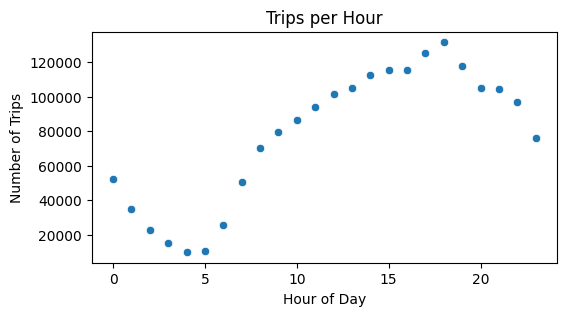

In [6]:
# Visualise the number of trips per hour and find the busiest hour

df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Count trips per hour and reset index
df_hr = df['pickup_hour'].value_counts().sort_values(ascending = False).reset_index()
df_hr.columns = ['pickup_hour', 'count']
#df_hr
print(df_hr.head(1)) #gives the hour at which the pickups are max


# Scatter plot
plt.figure(figsize=(6, 3))
sns.scatterplot(data=df_hr, x='pickup_hour', y='count', marker='o')
plt.title("Trips per Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.show()

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

   pickup_hour   count  count_scaled
0           18  131416     2628320.0
1           17  125354     2507080.0
2           19  117592     2351840.0
3           15  115349     2306980.0
4           16  115301     2306020.0


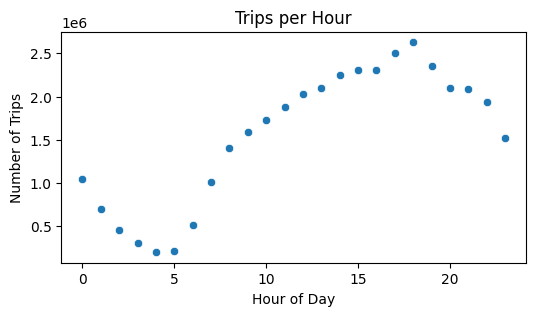

In [7]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
# Visualise the number of trips per hour and find the busiest hour
sampling_ratio = 0.05   # Change to your actual fraction
scale_factor = 1 / sampling_ratio

df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Count trips per hour and reset index
df_hr = df['pickup_hour'].value_counts().sort_values(ascending = False).reset_index()
df_hr.columns = ['pickup_hour', 'count']
#df_hr
df_hr['count_scaled'] = df_hr['count'] * scale_factor
print(df_hr.head(5)) #gives the top 5 hours at which the pickups are max

# Scatter plot
plt.figure(figsize=(6, 3))
sns.scatterplot(data=df_hr, x='pickup_hour', y='count_scaled', marker='o')
plt.title("Trips per Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.show()


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

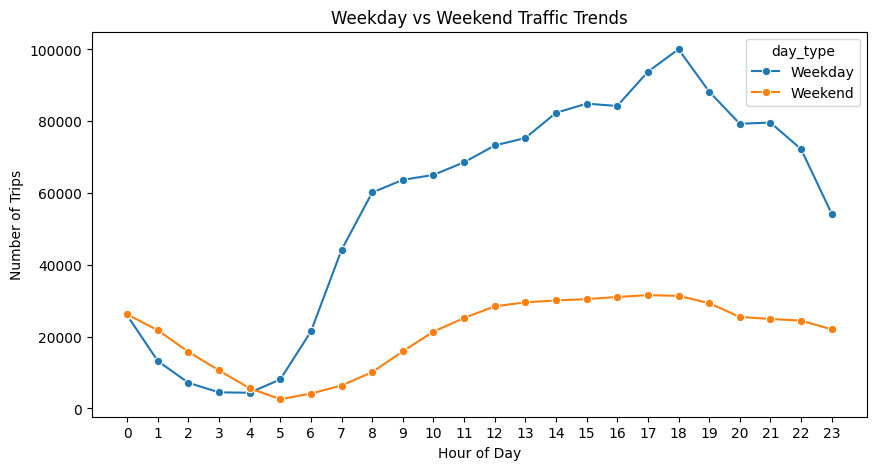

In [8]:
# Compare traffic trends for the week days and weekends
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day'] = df['tpep_pickup_datetime'].dt.dayofweek
df['day_type'] = df['pickup_day'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Count trips per hour for each type
df_hourly = df.groupby(['day_type', 'pickup_hour']).size().reset_index(name='count')

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_hourly, x='pickup_hour', y='count', hue='day_type', marker='o')
plt.title("Weekday vs Weekend Traffic Trends")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.xticks(range(0, 24))
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [9]:
# Find top 10 pickup and dropoff zones
#df['PULocationID'] #I need top 10 location ids whose hourly pickups are at max #we already have a column pick_hour
# Count hourly pickups
pickup_counts = df.groupby(['PULocationID', 'pickup_hour']).size().reset_index(name='count')

# Total pickups per zone (regardless of hour)
top_pickup_zones = pickup_counts.groupby('PULocationID')['count'].sum().nlargest(10).index

# Filter only top pickup zones
pickup_top10 = pickup_counts[pickup_counts['PULocationID'].isin(top_pickup_zones)]
high_hr_PU = pickup_top10['PULocationID'].unique()
high_hr_PU


array([132, 138, 142, 161, 162, 170, 186, 230, 236, 237])

In [10]:
# Find top 10 pickup and dropoff zones
#df['PULocationID'] #I need top 10 location ids whose hourly pickups are at max #we already have a column pick_hour
# Count hourly pickups
do_counts = df.groupby(['DOLocationID', 'pickup_hour']).size().reset_index(name='count')

# Total pickups per zone (regardless of hour)
do_counts_zones = do_counts.groupby('DOLocationID')['count'].sum().nlargest(10).index

# Filter only top pickup zones
do_top10 = do_counts[do_counts['DOLocationID'].isin(do_counts_zones)]
high_hr_DO = do_top10['DOLocationID'].unique()
high_hr_DO


array([ 68, 141, 142, 161, 162, 170, 230, 236, 237, 239])

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [11]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
df.columns

Pickup_Counts = df['PULocationID'].value_counts()
dropoff_counts = df['DOLocationID'].value_counts()

zones_merged = pd.merge(Pickup_Counts, dropoff_counts, left_on='PULocationID',
    right_on='DOLocationID',
    how='outer')
zones_merged.columns = ['Pickup_Counts', 'dropoff_counts']
zones_merged = zones_merged.fillna(0)
zones_merged['pickup_dropoff_ratio'] = zones_merged['Pickup_Counts'] / zones_merged['dropoff_counts']
zones_merged.sort_values('pickup_dropoff_ratio', ascending = False, inplace = True)
print('10 highest ratio')
print(zones_merged.head(10))
print('10 lowest ratio')
print(zones_merged.tail(10))

10 highest ratio
     Pickup_Counts  dropoff_counts  pickup_dropoff_ratio
194            2.0             0.0                   inf
69          8246.0           893.0              9.234043
127        95145.0         21056.0              4.518665
133        63939.0         24066.0              2.656819
181        63663.0         40601.0              1.568016
109        24699.0         17927.0              1.377754
42         31074.0         22664.0              1.371073
244        41265.0         30987.0              1.331687
157        66092.0         53008.0              1.246831
99         30392.0         25553.0              1.189371
10 lowest ratio
     Pickup_Counts  dropoff_counts  pickup_dropoff_ratio
151            1.0            26.0              0.038462
240            1.0            31.0              0.032258
246            1.0            34.0              0.029412
26             1.0            38.0              0.026316
0             49.0          5566.0              0.00880

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [12]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
df.columns
df_night = df[(df['pickup_hour'] >= 23) | (df['pickup_hour'] <= 5)]
df_night_1 = df_night.groupby('PULocationID').size().reset_index(name='count')
df_night_1.sort_values('count', ascending = False, inplace = True)
t1opu = df_night_1.head(10)['PULocationID'].tolist()
l10pu = df_night_1.tail(10)['PULocationID'].tolist()

df_night_2 = df_night.groupby('DOLocationID').size().reset_index(name='count')
df_night_2.sort_values('count', ascending = False, inplace = True)
t1odo = df_night_2.head(10)['DOLocationID'].tolist()
l10do = df_night_2.tail(10)['DOLocationID'].tolist()

print(f"Top 10 PU: {t1opu}")
print(f"Low 10 PU: {l10pu}")
print(f"Top 10 DO: {t1odo}")
print(f"Low 10 DO: {l10do}")

Top 10 PU: [79, 132, 249, 48, 148, 114, 230, 186, 164, 68]
Low 10 PU: [81, 44, 31, 3, 9, 192, 128, 185, 171, 153]
Top 10 DO: [79, 48, 170, 68, 107, 141, 263, 249, 230, 239]
Low 10 DO: [111, 253, 30, 172, 59, 187, 240, 44, 176, 99]


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [13]:
# Filter for night hours (11 PM to 5 AM)
revenue_night = df_night['total_amount'].sum()
print(f"Night revenue: {revenue_night}")

df_day = df[~((df['pickup_hour'] >= 23) | (df['pickup_hour'] <= 5))]  # Opposite of night hours
revenue_day = df_day['total_amount'].sum()
print(f"Day revenue: {revenue_day}")

Night revenue: 6526865.180000001
Day revenue: 47095377.33999998


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [14]:
# Analyse the fare per mile per passenger for different passenger counts

df['fare_per_mile_per_passenger'] = (
    df['fare_amount'] / (df['trip_distance'] * df['passenger_count'])
)

# Avoid division by zero or NaN
df = df.replace([float('inf'), -float('inf')], pd.NA).dropna(subset=['fare_per_mile_per_passenger'])

# 2. Group by passenger count and calculate average
fare_analysis = (
    df.groupby('passenger_count')['fare_per_mile_per_passenger']
    .mean()
    .reset_index()
    .sort_values(by='fare_per_mile_per_passenger', ascending=False)
)

print(fare_analysis)


   passenger_count  fare_per_mile_per_passenger
0              1.0                    10.786594
1              2.0                     6.432401
3              4.0                     4.363227
2              3.0                     3.908099
4              5.0                     1.709614
5              6.0                     1.350744


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [15]:
# Compare the average fare per mile for different days and for different times of the day
df['fare_per_mile'] = df['fare_amount'] / df['trip_distance']

# --- By hour of day ---
df['hour'] = df['tpep_pickup_datetime'].dt.hour
avg_fare_hour = (
    df.groupby('hour')['fare_per_mile']
    .mean()
    .reset_index()
    .sort_values('hour')
)

# --- By day of week ---
df['day_of_week'] = df['tpep_pickup_datetime'].dt.day_name()
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
avg_fare_day = (
    df.groupby('day_of_week')['fare_per_mile']
    .mean()
    .reindex(day_order)
    .reset_index()
)

# Display results
print("Average Fare per Mile by Hour:")
print(avg_fare_hour)

print("/nAverage Fare per Mile by Day of Week:")
print(avg_fare_day)


Average Fare per Mile by Hour:
    hour  fare_per_mile
0      0      10.372547
1      1      11.205206
2      2       9.875312
3      3      10.802813
4      4      13.234854
5      5      13.894556
6      6      10.987407
7      7      10.154647
8      8      10.308118
9      9      10.466256
10    10      10.739128
11    11      10.939761
12    12      11.696945
13    13      11.939735
14    14      11.546389
15    15      12.498474
16    16      13.817502
17    17      11.966156
18    18      11.536954
19    19      11.446739
20    20       9.560997
21    21       9.485441
22    22      10.126020
23    23      10.711384
/nAverage Fare per Mile by Day of Week:
  day_of_week  fare_per_mile
0      Monday      10.928148
1     Tuesday      11.319571
2   Wednesday      11.041087
3    Thursday      11.174598
4      Friday      10.905138
5    Saturday      10.760392
6      Sunday      12.506695


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [16]:
# Compare fare per mile for different vendors
df_vendor = df.loc[:,['VendorID','fare_per_mile']]
avg_fare_vendor = df_vendor.groupby('VendorID')['fare_per_mile'].mean().reset_index()
avg_fare_vendor

,VendorID,fare_per_mile
0,1,8.125524
1,2,12.302985
2,6,6.282738


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [17]:
# Defining distance tiers
def distance_tier(d):
    if d <= 2:
        return 'Up to 2 miles'
    elif d <= 5:
        return '2 to 5 miles'
    else:
        return 'More than 5 miles'

df['distance_tier'] = df['trip_distance'].apply(distance_tier)

# Group by VendorID and distance tier
tier_analysis = (
    df.groupby(['VendorID', 'distance_tier'])['fare_per_mile']
    .mean()
    .reset_index()
    .sort_values(['distance_tier', 'fare_per_mile'], ascending=[True, False])
)

print(tier_analysis.sort_values(by=['distance_tier', 'VendorID']))

   VendorID      distance_tier  fare_per_mile
0         1       2 to 5 miles       6.382426
3         2       2 to 5 miles       6.538461
6         6       2 to 5 miles       8.107119
1         1  More than 5 miles       4.426758
4         2  More than 5 miles       4.490539
7         6  More than 5 miles       4.382026
2         1      Up to 2 miles       9.911689
5         2      Up to 2 miles      17.940902
8         6      Up to 2 miles      32.422471


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

/tmp/ipython-input-443545069.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_tip_by_distance = df.groupby('distance_group')['tip_percentage'].mean().reset_index()


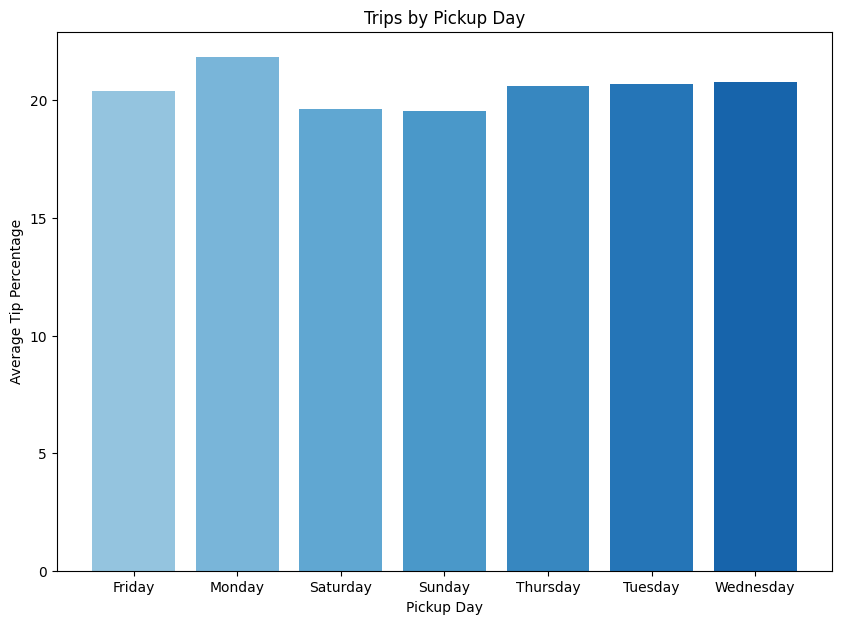

In [40]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

df['tip_percentage'] = (df['tip_amount'] / df['fare_amount']) * 100

#fine distance bins
distance_bins = [0, 2, 5, 10, 20, df['trip_distance'].max()]
distance_labels = ['0-2 miles', '2-5 miles', '5-10 miles', '10-20 miles', '20+ miles']
df['distance_group'] = pd.cut(df['trip_distance'], bins=distance_bins, labels=distance_labels, right=False)

avg_tip_by_distance = df.groupby('distance_group')['tip_percentage'].mean().reset_index()

#Number of passengers should also do this
vg_tip_by_passenger = df.groupby('passenger_count')['tip_percentage'].mean().reset_index()

#Pickup time
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
avg_tip_by_hour = df.groupby('pickup_hour')['tip_percentage'].mean().reset_index()

#Pickup day of week
df['pickup_day'] = df['tpep_pickup_datetime'].dt.day_name()
avg_tip_by_day = df.groupby('pickup_day')['tip_percentage'].mean().reset_index()

plt.figure(figsize=(10,7))
colors = plt.cm.Blues(np.linspace(0.4, 0.8, len(avg_tip_by_day)))
plt.bar(avg_tip_by_day['pickup_day'], avg_tip_by_day['tip_percentage'], color=colors)
plt.xlabel("Pickup Day")
plt.ylabel("Average Tip Percentage")
plt.title("Trips by Pickup Day")
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [19]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%


low_tips = df[df['tip_percentage'] < 10]
high_tips = df[df['tip_percentage'] > 25]

# Compare averages for key features
comparison = pd.DataFrame({
    'Low Tip % (<10)': [
        low_tips['trip_distance'].mean(),
        low_tips['passenger_count'].mean(),
        low_tips['fare_amount'].mean(),
        low_tips['tip_percentage'].mean()
    ],
    'High Tip % (>25)': [
        high_tips['trip_distance'].mean(),
        high_tips['passenger_count'].mean(),
        high_tips['fare_amount'].mean(),
        high_tips['tip_percentage'].mean()
    ]
}, index=['Avg Trip Distance', 'Avg Passenger Count', 'Avg Fare Amount', 'Avg Tip Percentage'])

print(comparison)

                     Low Tip % (<10)  High Tip % (>25)
Avg Trip Distance           3.938333          2.310612
Avg Passenger Count         1.417324          1.358722
Avg Fare Amount            21.665446         14.440492
Avg Tip Percentage          1.083931         32.508941


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

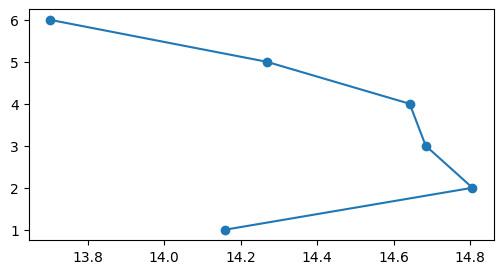

In [20]:
# See how passenger count varies across hours and days

#df.columns
df_passenger_hr = df.groupby('passenger_count')['pickup_hour'].mean().reset_index()
df_passenger_hr.columns = ['passenger_count', 'pickup_hour']

plt.figure(figsize = (6,3))
plt.plot(df_passenger_hr['pickup_hour'], df_passenger_hr['passenger_count'], marker='o')


In [ ]:
df_passenger_day = df.groupby('passenger_count')['pickup_day'].mean().reset_index()

plt.figure(figsize = (6,3))
plt.plot(df_passenger_day['pickup_day'], df_passenger_day['passenger_count'], marker='o')


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [21]:
# How does passenger count vary across zones

avg_passenger_by_zone_id = (
    df.groupby('PULocationID')['passenger_count']
    .mean()
    .reset_index()
    .sort_values('passenger_count', ascending=False)
)
avg_passenger_by_zone_id.columns = ['PULocationID', 'avg_passenger_count']


In [22]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

df.merge(avg_passenger_by_zone_id, left_on='PULocationID', right_on='PULocationID', how='left')

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,pickup_day,day_type,fare_per_mile_per_passenger,fare_per_mile,hour,day_of_week,distance_tier,tip_percentage,distance_group,avg_passenger_count
0,2,2022-12-31 23:51:30,2022-12-31 23:56:06,1.0,0.86,1.0,141,140,1,6.5,...,Saturday,Weekend,7.558140,7.558140,23,Saturday,Up to 2 miles,30.769231,0-2 miles,1.322441
1,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,138,256,2,32.4,...,Sunday,Weekend,4.186047,4.186047,0,Sunday,More than 5 miles,0.000000,5-10 miles,1.362924
2,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,161,237,1,7.9,...,Sunday,Weekend,3.185484,6.370968,0,Sunday,Up to 2 miles,32.658228,0-2 miles,1.386149
3,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1.0,237,141,2,11.4,...,Sunday,Weekend,2.638889,7.916667,0,Sunday,Up to 2 miles,0.000000,0-2 miles,1.336469
4,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.54,1.0,143,142,2,6.5,...,Sunday,Weekend,12.037037,12.037037,0,Sunday,Up to 2 miles,0.000000,0-2 miles,1.314388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1858275,2,2023-12-31 23:38:35,2024-01-01 00:05:50,5.0,9.29,1.0,48,25,1,41.5,...,Sunday,Weekend,0.893434,4.467169,23,Sunday,More than 5 miles,22.409639,5-10 miles,1.410016
1858276,2,2023-12-31 23:44:09,2023-12-31 23:50:04,1.0,0.81,1.0,263,262,1,7.2,...,Sunday,Weekend,8.888889,8.888889,23,Sunday,Up to 2 miles,33.888889,0-2 miles,1.327335
1858277,2,2023-12-31 23:44:04,2024-01-01 00:03:36,1.0,5.78,1.0,161,261,1,27.5,...,Sunday,Weekend,4.757785,4.757785,23,Sunday,More than 5 miles,14.545455,5-10 miles,1.386149
1858278,2,2023-12-31 23:37:20,2023-12-31 23:41:18,1.0,1.06,1.0,79,137,1,7.2,...,Sunday,Weekend,6.792453,6.792453,23,Sunday,Up to 2 miles,33.888889,0-2 miles,1.390030


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

<Axes: xlabel='PULocationID', ylabel='extra'>

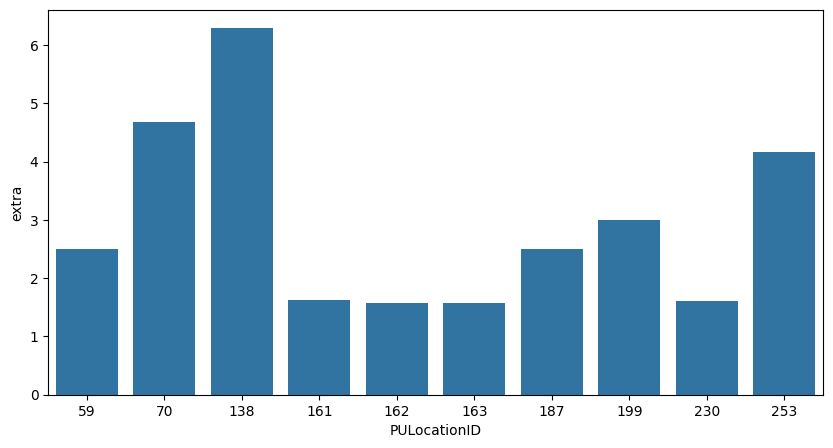

In [36]:
# How often is each surcharge applied?

df.loc[:,['PULocationID','extra']]

#by zones
zone_extra = df.groupby('PULocationID')['extra'].mean().reset_index().sort_values('extra', ascending=False)

#by time
hourly_extra = df.groupby('pickup_hour')['extra'].mean().reset_index().sort_values('extra', ascending=False)

#by both
zone_time_extra = (
    df.groupby(['PULocationID', 'pickup_hour'])['extra']
      .mean()
      .reset_index()
      .sort_values('extra', ascending=False)
)

#top 10 zones
plt.figure(figsize=(10, 5))
sns.barplot(data=zone_extra.head(10), x='PULocationID', y='extra')

<Axes: xlabel='pickup_hour', ylabel='extra'>

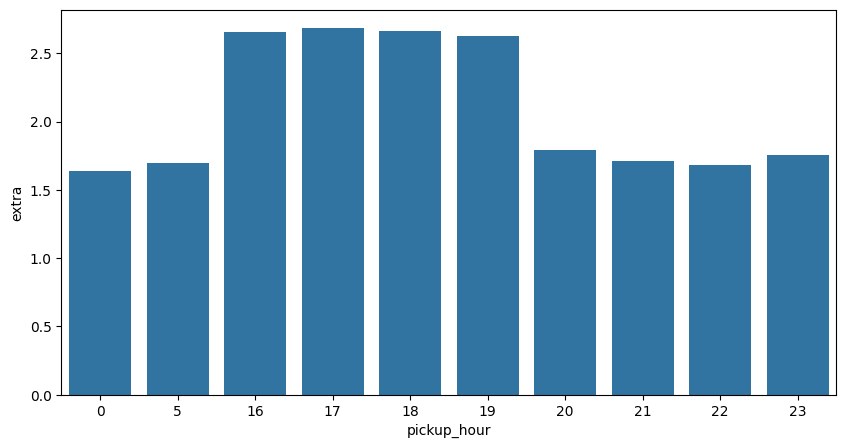

In [38]:
#top 10 zones
plt.figure(figsize=(10, 5))
sns.barplot(data=hourly_extra.head(10), x='pickup_hour', y='extra')

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:
#Based on the patterns, Pickup/dropoff hot spots can be predicted by historical frequency and fare profitability.
#Extra charges and high demand often correlate with certain times (rush hours, late nights, weekends).

#Operational inefficiency would probably be with respect to having lesser cabs positioned in the right zones or spots at the peak hours.
#Zones like 132 needs to have higher number of cabs positioned.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
#The high peaks are on Thursdays, and high peak hours are 6pm evenings. More cabs better be positioned to be around 6pm on Thrusdays. Moderately higher number of cabs need to be positioned at around 6pm.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
#Day revenues are generally higher than the night revenues. So prices can be kept keeping profits in mind during the day. More so during the peak hours, i.e. 6pm if we keep the prices upto Rs. 5 higher,
    #there will be significant rise in revenue.
#VendorID 2, in general keeps higher fare amount in avaerage, so the revenue could be highly affected by this vendor, especially if the drive is upto 2 miles.

In [ ]:
import pandas as pd

try:
    df_jan = pd.read_parquet('/content/2023-1.parquet')
    print("File loaded successfully. It might not be corrupted.")
except OSError as e:
    print(f"Error loading file: {e}. The file appears to be corrupted.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")